### Условие задачи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### 1. Загрузка данных.

In [94]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [95]:
# Путь к файлам проекта
PATH = r"C:\Users\ivan\YandexDisk\DS\Project_Final\Final_project"
#PATH ='/datasets/final_provider/' 

# Записываем датасеты в переменные
df_contract = pd.read_csv(os.path.join(PATH,'contract.csv'))
df_internet = pd.read_csv(os.path.join(PATH,'internet.csv'))
df_personal = pd.read_csv(os.path.join(PATH,'personal.csv'))
df_phone = pd.read_csv(os.path.join(PATH,'phone.csv'))

**Данные по договорам**

In [96]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [97]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [98]:
#  Проверка наличия дубликатов
df_contract.duplicated().sum()

0

**Данные по использованию интернета**

In [99]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [100]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [101]:
#  Проверка наличия дубликатов
df_internet.duplicated().sum()

0

**Данные по абонентам**

In [102]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [103]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [104]:
#  Проверка наличия дубликатов
df_personal.duplicated().sum()

0

**Данные по использованию телефона**

In [105]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [106]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [107]:
#  Проверка наличия дубликатов
df_phone.duplicated().sum()

0

### Выводы:
1. **Contract**. Пропусков и дубликатов нет. Необходимо заменить тип данных в столбцах *BeginDate, EndDate* на **DateTime** и столбца *TotalCharges* на **float**.
2. **Internet**. Пропусков и дубликатов нет. Тип данных соответствует содержанию. Для использования в модели бинарные значения будут преобразованы в 0 и 1.
3. **Personal**. Пропусков и дубликатов нет. Тип данных соответствует содержанию. Непонятен смысл столбцов *SeniorCitizen, Partner, Dependents*.
4. **Phone**. Пропусков и дубликатов нет. Тип данных соответствует содержанию.
 


## 2.  Подготовка данных к анализу

**Данные по договорам**
___
**Замена типа данных**

In [112]:
# Преобразование типа данных
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

#Замена Enddate для неушедших клиентов

df_contract.loc[df_contract['EndDate'] == 'No','EndDate'] = '2020-02-01'
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'] , errors = 'coerce')

In [114]:
# Проверим пропуски при замене типа данных
df_contract[df_contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN


In [115]:
# Проверим какие значения у других новых клиентов
df_contract[df_contract['BeginDate']=='2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN


In [49]:
# Заполнение пропусков после преобразования чисел

# Список индексов строк с пропусками
new_client_charge_ind = df_contract[df_contract['TotalCharges'].isna()]['MonthlyCharges'].index

# Заполнение пропусков
for index in new_client_charge_ind:
    df_contract.loc[index,'TotalCharges'] = df_contract.loc[index,'MonthlyCharges'] 

In [50]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


#### Распределение признаков MonthlyCharges, TotalCharges

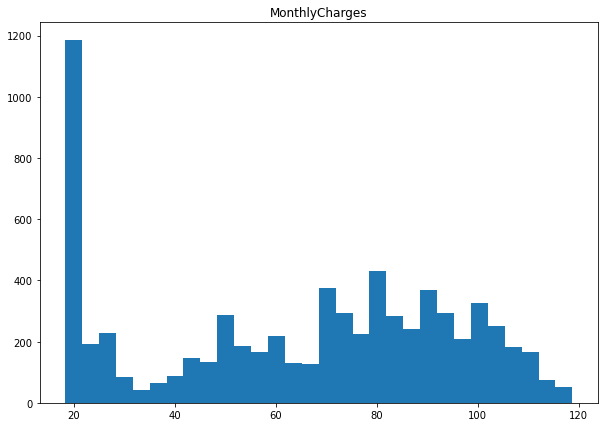

In [51]:
plt.figure(figsize = (10,7))
plt.hist(df_contract['MonthlyCharges'], bins = 30);
plt.title('MonthlyCharges');

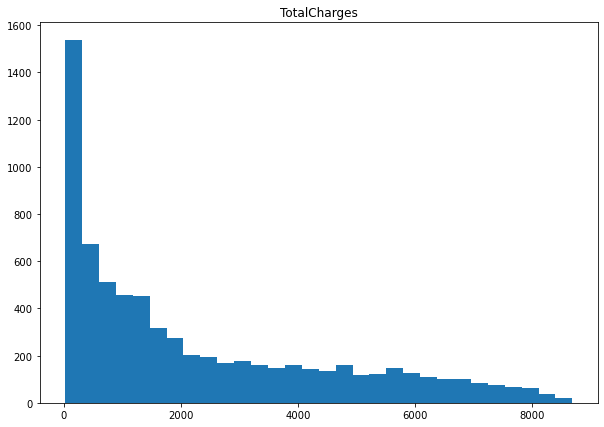

In [52]:
plt.figure(figsize = (10,7))
plt.hist(df_contract['TotalCharges'], bins = 30);
plt.title('TotalCharges');

___
**Ушедшие клиенты**

In [53]:
df_gone = df_contract[df_contract['EndDate'] > '1970-01-01']
df_gone.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05
13,0280-XJGEX,2015-09-01,2019-10-01,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [54]:
print('Всего ушедших клиентов:', len(df_gone))

Всего ушедших клиентов: 1869


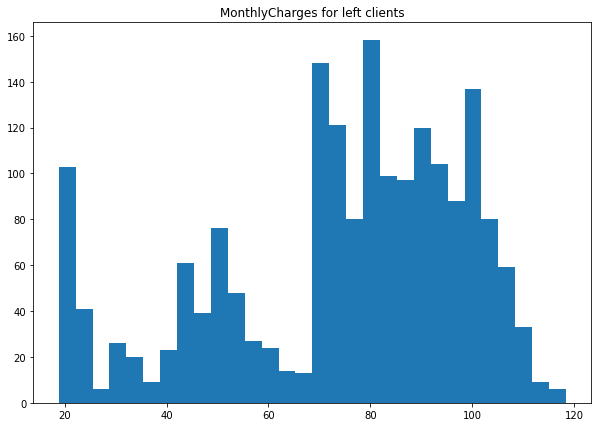

In [55]:
plt.figure(figsize = (10,7))
plt.hist(df_gone['MonthlyCharges'], bins = 30);
plt.title('MonthlyCharges for left clients');

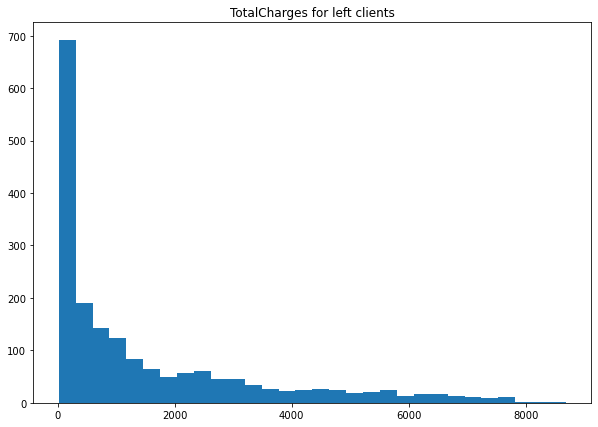

In [56]:
plt.figure(figsize = (10,7))
plt.hist(df_gone['TotalCharges'], bins = 30);
plt.title('TotalCharges for left clients');

#### Выводы по анализу:
1. Изменен тип данных дат. В столбце EndDate для неушедших клиентов значение заменено на дату актуализации датасета для дальнейшего учета длительности контракта.
2. Изменен тип данных стоимости на float.
3. 
    

## План работы:
1. Определить целевой признак.
    - Клиент ушел - 1 (1869 клиентов)
    - Клиент не уходит - 0 (5174 клиентов);
2. Подготовить данные для анализа влияния признаков на целевой признак (EDA). Провести исследовательский анализ. 
3. Определить признаки, которые будут использоваться для обучения модели. 
4. Определить состав обучающей и тестовой выборок. 
5. Определить метрики. 
6. Обучить модели и выбрать одну модель.
7. Предсказать уход клиента.
8. Сделать выводы и подготовить отчет.

In [ ]:
# Вопросы:
1. 